In [197]:
#importando as bibliotecas
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
%matplotlib inline

In [198]:
#Lendo o arquivo

df = pd.read_csv('C://Users//Herla//OneDrive//Desktop//TCC//all_bovespa4.csv')
df

,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_maximo,preco_minimo,preco_fechamento,qtd_negocios,volume_negocio
0,2017-01-02,AALR3,ALLIAR,14.62,14.88,14.40,0.1460,359,523505
1,2017-01-02,ABCB4,ABC BRASIL,13.40,13.52,13.08,0.1331,1958,2605570
2,2017-01-02,ABEV3,AMBEV S/A,16.34,16.66,16.26,0.1631,42654,70040067
3,2017-01-02,ADHM3,ADVANCED-DH,0.81,0.83,0.76,0.0079,686,54075
4,2017-01-02,AFLT3,AFLUENTE T,3.18,3.18,3.18,0.0318,1,318
...,...,...,...,...,...,...,...,...,...
551606,2021-11-12,X1YL34,XYLEM INC,357.35,357.35,355.60,3.5560,0,712
551607,2021-11-12,XPBR31,XP INC,184.61,185.00,179.20,1.8401,3394,62000612
551608,2021-11-12,YDUQ3,YDUQS PART,24.19,24.76,23.50,0.2381,16745,40076682
551609,2021-11-12,Z1OM34,ZOOM VIDEO,53.72,55.50,53.40,0.5550,274,1478267


In [199]:
#filtrando o ação
df_acao = df[df['sigla_acao'] == 'EVEN3']

In [200]:
#verificar o tipo do arquivo
df_acao.dtypes

data_pregao          object
sigla_acao           object
nome_acao            object
preco_abertura      float64
preco_maximo        float64
preco_minimo        float64
preco_fechamento    float64
qtd_negocios          int64
volume_negocio        int64
dtype: object

In [201]:
#Mudar o tipo data
df_acao['data_pregao'] = pd.to_datetime(df_acao['data_pregao'], format='%Y-%m-%d')

C:\Users\Herla\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [202]:
#verificar o tipo do arquivo
df_acao.dtypes

data_pregao         datetime64[ns]
sigla_acao                  object
nome_acao                   object
preco_abertura             float64
preco_maximo               float64
preco_minimo               float64
preco_fechamento           float64
qtd_negocios                 int64
volume_negocio               int64
dtype: object

In [203]:
#criando novos campos de medias móveis
df_acao['mm5d'] = df_acao['preco_fechamento'].rolling(5).mean()
df_acao['mm21d'] = df_acao['preco_fechamento'].rolling(21).mean()

C:\Users\Herla\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Herla\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
df_acao

,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_maximo,preco_minimo,preco_fechamento,qtd_negocios,volume_negocio,mm5d,mm21d
105,2017-01-02,EVEN3,EVEN,3.70,3.79,3.63,0.0373,2900,1075200,NaN,NaN
393,2017-01-03,EVEN3,EVEN,3.73,3.93,3.71,0.0389,13272,5029748,NaN,NaN
711,2017-01-04,EVEN3,EVEN,3.88,4.02,3.86,0.0390,12853,5064880,NaN,NaN
1032,2017-01-05,EVEN3,EVEN,3.90,4.01,3.83,0.0398,8686,3422416,NaN,NaN
1330,2017-01-06,EVEN3,EVEN,4.01,4.05,3.88,0.0396,5003,1970484,0.03892,NaN
...,...,...,...,...,...,...,...,...,...,...,...
547837,2021-11-08,EVEN3,EVEN,6.77,6.82,6.51,0.0656,10101,6680044,0.06604,0.070471
548674,2021-11-09,EVEN3,EVEN,6.57,7.00,6.56,0.0690,18949,13064102,0.06698,0.070248
549497,2021-11-10,EVEN3,EVEN,6.88,7.20,6.84,0.0703,13614,9612630,0.06762,0.069848
550319,2021-11-11,EVEN3,EVEN,7.11,7.35,6.92,0.0698,25352,18024482,0.06848,0.069529


In [204]:
#empurrando para frente os valores das ações
df_acao['preco_fechamento'] = df_acao['preco_fechamento'].shift(-10)

df_acao.head()

C:\Users\Herla\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_maximo,preco_minimo,preco_fechamento,qtd_negocios,volume_negocio,mm5d,mm21d
105,2017-01-02,EVEN3,EVEN,3.70,3.79,3.63,0.0434,2900,1075200,NaN,NaN
393,2017-01-03,EVEN3,EVEN,3.73,3.93,3.71,0.0428,13272,5029748,NaN,NaN
711,2017-01-04,EVEN3,EVEN,3.88,4.02,3.86,0.0420,12853,5064880,NaN,NaN
1032,2017-01-05,EVEN3,EVEN,3.90,4.01,3.83,0.0423,8686,3422416,NaN,NaN
1330,2017-01-06,EVEN3,EVEN,4.01,4.05,3.88,0.0426,5003,1970484,0.03892,NaN


In [205]:
#retirando os dados nulos
df_acao.dropna(inplace=True)
df_acao

C:\Users\Herla\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_maximo,preco_minimo,preco_fechamento,qtd_negocios,volume_negocio,mm5d,mm21d
6411,2017-01-31,EVEN3,EVEN,4.50,4.57,4.47,0.0494,9279,4190934,0.04484,0.041790
6750,2017-02-01,EVEN3,EVEN,4.51,4.81,4.51,0.0503,22180,10489959,0.04562,0.042271
7074,2017-02-02,EVEN3,EVEN,4.75,5.05,4.71,0.0504,17715,8658040,0.04614,0.042724
7423,2017-02-03,EVEN3,EVEN,4.85,5.17,4.84,0.0500,22855,11585382,0.04726,0.043286
7792,2017-02-06,EVEN3,EVEN,5.29,5.42,5.15,0.0521,22467,11782475,0.04862,0.043848
...,...,...,...,...,...,...,...,...,...,...,...
539351,2021-10-22,EVEN3,EVEN,6.81,6.95,6.40,0.0656,21627,14458600,0.07196,0.076552
540234,2021-10-25,EVEN3,EVEN,6.91,7.06,6.75,0.0690,16460,11466854,0.07036,0.075833
541089,2021-10-26,EVEN3,EVEN,6.87,6.90,6.47,0.0703,20239,13297849,0.06880,0.074957
541927,2021-10-27,EVEN3,EVEN,6.53,6.92,6.52,0.0698,24952,16889853,0.06778,0.074324


In [216]:
#verificcanndo quantidade de linhas
qtd_linhas = len(df_acao) 
qtd_linhas_treino = qtd_linhas -269
qtd_linhas_teste = qtd_linhas -23


qtd_linhas_validaçao = qtd_linhas_treino - qtd_linhas_teste

info =(
    f"linhas treino = 0:{qtd_linhas_treino} "
    f"linhas teste = {qtd_linhas_treino}:{qtd_linhas_teste} "
    f"linhas Validação = {qtd_linhas_teste}:{qtd_linhas} "
)
info


'linhas treino = 0:904 linhas teste = 904:1150 linhas Validação = 1150:1173 '

In [217]:
#reindexando o data frame
df_acao = df_acao.reset_index(drop=True)
df_acao

,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_maximo,preco_minimo,preco_fechamento,qtd_negocios,volume_negocio,mm5d,mm21d
0,2017-01-31,EVEN3,EVEN,4.50,4.57,4.47,0.0494,9279,4190934,0.04484,0.041790
1,2017-02-01,EVEN3,EVEN,4.51,4.81,4.51,0.0503,22180,10489959,0.04562,0.042271
2,2017-02-02,EVEN3,EVEN,4.75,5.05,4.71,0.0504,17715,8658040,0.04614,0.042724
3,2017-02-03,EVEN3,EVEN,4.85,5.17,4.84,0.0500,22855,11585382,0.04726,0.043286
4,2017-02-06,EVEN3,EVEN,5.29,5.42,5.15,0.0521,22467,11782475,0.04862,0.043848
...,...,...,...,...,...,...,...,...,...,...,...
1168,2021-10-22,EVEN3,EVEN,6.81,6.95,6.40,0.0656,21627,14458600,0.07196,0.076552
1169,2021-10-25,EVEN3,EVEN,6.91,7.06,6.75,0.0690,16460,11466854,0.07036,0.075833
1170,2021-10-26,EVEN3,EVEN,6.87,6.90,6.47,0.0703,20239,13297849,0.06880,0.074957
1171,2021-10-27,EVEN3,EVEN,6.53,6.92,6.52,0.0698,24952,16889853,0.06778,0.074324


In [218]:
#separando as features e labels

features = df_acao.drop(['sigla_acao', 'nome_acao', 'data_pregao', 'preco_fechamento'], 1)
labels = df_acao['preco_fechamento']

In [219]:
#escolhendo as melhores features com kbest

features_list = ('preco_abertura', 'qtd_negocios', 'volume_negocio', 'mm5d', 'mm21d')

k_best_features = SelectKBest(k='all')
k_best_features.fit_transform(features, labels)
k_best_features_scores = k_best_features.scores_
raw_pairs = zip(features_list[1:], k_best_features_scores)
ordered_pairs = list(reversed(sorted(raw_pairs, key=lambda x: x[1])))

k_best_features_final = dict(ordered_pairs[:15])
best_features = k_best_features_final.keys()
print('')
print("Melhores features")
print(k_best_features_final)


Melhores features
{'mm5d': 34.895251897961614, 'volume_negocio': 32.511305235653325, 'qtd_negocios': 31.92940785948776, 'mm21d': 1.599659671146376}


In [220]:
#separando as features escolhidas
features = df_acao.drop(['sigla_acao', 'nome_acao', 'data_pregao', 'preco_fechamento', 'preco_abertura', 'mm21d'], 1)

In [221]:
#Normalizando os dados de entrada(features)

#Gerando o novo padrão
scaler = MinMaxScaler().fit(features)
features_scale = scaler.transform(features)

print('Features: ', features_scale.shape)
print (features_scale)

Features:  (1173, 5)
[[0.09436275 0.0997426  0.0925276  0.03799408 0.09314678]
 [0.10906863 0.1023166  0.23536576 0.09976185 0.09819925]
 [0.12377451 0.11518662 0.18592987 0.08179818 0.10156756]
 ...
 [0.23713235 0.22844273 0.21387526 0.1272958  0.24834823]
 [0.23835784 0.23166023 0.26605698 0.16251873 0.24174116]
 [0.23468137 0.22779923 0.18692634 0.11240703 0.23681824]]


In [222]:
#separa os dados de treino e validação

x_train = features_scale[:qtd_linhas_treino]
x_test = features_scale[qtd_linhas_treino:qtd_linhas_teste]

y_train = labels[:qtd_linhas_treino]
y_test = labels[qtd_linhas_treino:qtd_linhas_teste]

print(len(x_train), len(y_train))

print(len(x_test), len(y_test))

904 904
246 246


Coeficiente de determinação:55.97
RMSE: 0.009252
MSE: 0.000086


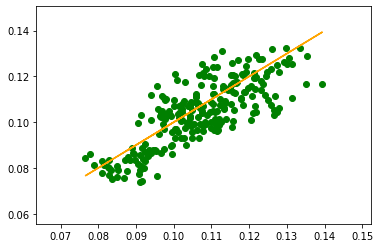

In [223]:
#treinamento usando regressão Linear

lr = linear_model.LinearRegression()
lr.fit(x_train, y_train)
pred= lr.predict(x_test)
cd =r2_score(y_test, pred)

print(f'Coeficiente de determinação:{cd * 100:.2f}')
plt.scatter(pred,y_test,color="green", marker='o')
plt.plot(pred,pred,color="orange")



print('RMSE: %.6f' % np.sqrt(mean_squared_error(y_test, pred )))
print('MSE: %.6f' % mean_squared_error(y_test, pred))


In [224]:
#executando a previsão

previsao=features_scale[qtd_linhas_teste:qtd_linhas]

data_pregao_full = df_acao['data_pregao']
data_pregao=data_pregao_full[qtd_linhas_teste:qtd_linhas]

res_full=df_acao['preco_fechamento']
res=res_full[qtd_linhas_teste:qtd_linhas]

pred=lr.predict(previsao)

df= pd.DataFrame({'data_pregao': data_pregao, 'real':res, 'previsao':pred})
df['real'] = df['real'].shift(+10)

df.set_index('data_pregao', inplace=True)
print(df)


               real  previsao
data_pregao                  
2021-09-27      NaN  0.081566
2021-09-28      NaN  0.076314
2021-09-29      NaN  0.076415
2021-09-30      NaN  0.078577
2021-10-01      NaN  0.081215
2021-10-04      NaN  0.077579
2021-10-05      NaN  0.077398
2021-10-06      NaN  0.072243
2021-10-07      NaN  0.075019
2021-10-08      NaN  0.077669
2021-10-11   0.0765  0.080247
2021-10-13   0.0792  0.079995
2021-10-14   0.0759  0.078872
2021-10-15   0.0767  0.077518
2021-10-18   0.0772  0.075217
2021-10-19   0.0728  0.073803
2021-10-20   0.0726  0.072630
2021-10-21   0.0691  0.069136
2021-10-22   0.0681  0.062020
2021-10-25   0.0692  0.070207
2021-10-26   0.0650  0.066790
2021-10-27   0.0675  0.070117
2021-10-28   0.0653  0.067676


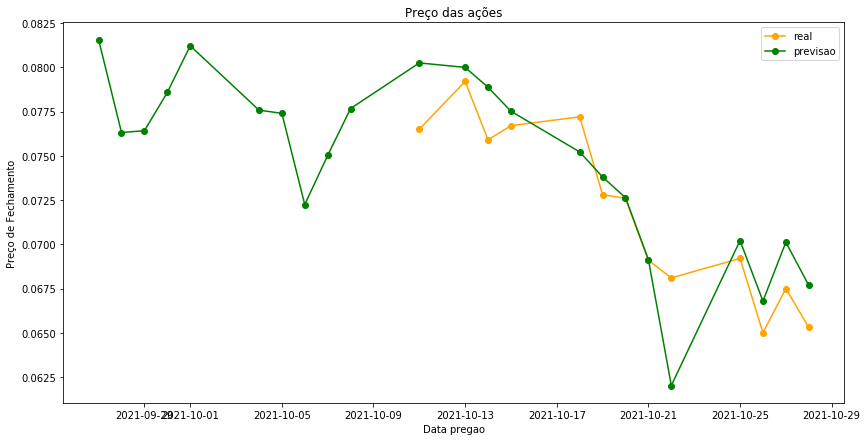

In [225]:
#grafico
plt.figure(figsize=(14,7))
plt.title('Preço das ações')
plt.plot(df['real'], label="real", color='orange', marker='o')
plt.plot(df['previsao'], label="previsao",color='green', marker='o')
plt.xlabel('Data pregao')
plt.ylabel('Preço de Fechamento')
leg = plt.legend()

In [ ]:
#case 1-------------------------case 1-----------------------------------------case 1

In [178]:
#importando as bibliotecas
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
%matplotlib inline

In [179]:
#Lendo o arquivo

df = pd.read_csv('C://Users//Herla//OneDrive//Desktop//TCC//all_bovespa3.csv')
df

,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_maximo,preco_minimo,preco_fechamento,qtd_negocios,volume_negocio
0,2019-01-02,AALR3,ALLIAR,13.31,13.50,13.25,0.1325,2642,3523962
1,2019-01-02,AAPL34,APPLE,60.71,60.71,59.89,0.6041,168,1015969
2,2019-01-02,ABBV34,ABBVIE,342.84,342.84,342.84,3.4284,3,102852
3,2019-01-02,ABCB4,ABC BRASIL,16.47,17.20,16.35,0.1712,5717,9598300
4,2019-01-02,ABEV3,AMBEV S/A,15.40,16.30,15.40,0.1615,186929,298201954
...,...,...,...,...,...,...,...,...,...
381485,2020-12-28,Z1TO34,ZTO EXPRESS,36.72,36.72,36.72,0.3672,0,1358
381486,2020-12-29,Z1TO34,ZTO EXPRESS,36.31,36.31,36.31,0.3631,1,3631
381487,2020-12-30,Z1TO34,ZTO EXPRESS,38.09,38.09,37.50,0.3750,0,2295
381488,2020-12-23,Z1TS34,ZOETIS INC,209.18,209.18,209.18,2.0918,0,10459


In [180]:
#filtrando o ação
df_acao = df[df['sigla_acao'] == 'EVEN3']

In [181]:
#Mudar o tipo data
df_acao['data_pregao'] = pd.to_datetime(df_acao['data_pregao'], format='%Y-%m-%d')

C:\Users\Herla\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [182]:
#verificar o tipo do arquivo
df_acao.dtypes

data_pregao         datetime64[ns]
sigla_acao                  object
nome_acao                   object
preco_abertura             float64
preco_maximo               float64
preco_minimo               float64
preco_fechamento           float64
qtd_negocios                 int64
volume_negocio               int64
dtype: object

In [183]:
#criando novos campos de medias móveis
df_acao['mm5d'] = df_acao['preco_fechamento'].rolling(5).mean()
df_acao['mm21d'] = df_acao['preco_fechamento'].rolling(21).mean()

C:\Users\Herla\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Herla\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [184]:
df_acao

,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_maximo,preco_minimo,preco_fechamento,qtd_negocios,volume_negocio,mm5d,mm21d
148,2019-01-02,EVEN3,EVEN,6.00,6.15,5.95,0.0611,9955,6067163,NaN,NaN
506,2019-01-03,EVEN3,EVEN,6.03,6.26,6.03,0.0626,20802,12800097,NaN,NaN
854,2019-01-04,EVEN3,EVEN,6.23,6.27,6.08,0.0619,9778,6068485,NaN,NaN
1205,2019-01-07,EVEN3,EVEN,6.14,6.35,6.09,0.0622,13317,8293939,NaN,NaN
1568,2019-01-08,EVEN3,EVEN,6.22,6.26,6.11,0.0617,4127,2545625,0.06190,NaN
...,...,...,...,...,...,...,...,...,...,...,...
379075,2020-12-22,EVEN3,EVEN,12.63,12.71,12.04,0.1221,23345,28677877,0.12734,0.127390
379076,2020-12-23,EVEN3,EVEN,12.24,12.31,12.02,0.1219,18843,22903975,0.12522,0.127400
379077,2020-12-28,EVEN3,EVEN,12.21,12.24,11.82,0.1204,21590,25990976,0.12348,0.127133
379078,2020-12-29,EVEN3,EVEN,12.15,12.51,11.92,0.1233,21535,26432900,0.12254,0.127029


In [185]:
#empurrando para frente os valores das ações
df_acao['preco_fechamento'] = df_acao['preco_fechamento'].shift(-1)

df_acao.head()

C:\Users\Herla\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_maximo,preco_minimo,preco_fechamento,qtd_negocios,volume_negocio,mm5d,mm21d
148,2019-01-02,EVEN3,EVEN,6.00,6.15,5.95,0.0626,9955,6067163,NaN,NaN
506,2019-01-03,EVEN3,EVEN,6.03,6.26,6.03,0.0619,20802,12800097,NaN,NaN
854,2019-01-04,EVEN3,EVEN,6.23,6.27,6.08,0.0622,9778,6068485,NaN,NaN
1205,2019-01-07,EVEN3,EVEN,6.14,6.35,6.09,0.0617,13317,8293939,NaN,NaN
1568,2019-01-08,EVEN3,EVEN,6.22,6.26,6.11,0.0625,4127,2545625,0.0619,NaN


In [186]:
#retirando os dados nulos
df_acao.dropna(inplace=True)
df_acao

C:\Users\Herla\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_maximo,preco_minimo,preco_fechamento,qtd_negocios,volume_negocio,mm5d,mm21d
7255,2019-01-31,EVEN3,EVEN,6.70,6.97,6.61,0.0651,17336,11783543,0.06720,0.064533
7612,2019-02-01,EVEN3,EVEN,6.77,6.85,6.49,0.0637,13901,9127199,0.06668,0.064724
7981,2019-02-04,EVEN3,EVEN,6.54,6.58,6.12,0.0640,21101,13325087,0.06592,0.064776
8347,2019-02-05,EVEN3,EVEN,6.36,6.47,6.26,0.0614,13398,8523993,0.06542,0.064876
8687,2019-02-06,EVEN3,EVEN,6.37,6.39,6.04,0.0595,11136,6954915,0.06430,0.064838
...,...,...,...,...,...,...,...,...,...,...,...
379074,2020-12-21,EVEN3,EVEN,12.37,12.75,12.00,0.1221,20025,24818686,0.12942,0.127195
379075,2020-12-22,EVEN3,EVEN,12.63,12.71,12.04,0.1219,23345,28677877,0.12734,0.127390
379076,2020-12-23,EVEN3,EVEN,12.24,12.31,12.02,0.1204,18843,22903975,0.12522,0.127400
379077,2020-12-28,EVEN3,EVEN,12.21,12.24,11.82,0.1233,21590,25990976,0.12348,0.127133


In [187]:
#verificcanndo quantidade de linhas
qtd_linhas = len(df_acao) 
qtd_linhas_treino = qtd_linhas -172
qtd_linhas_teste = qtd_linhas -6


qtd_linhas_validaçao = qtd_linhas_treino - qtd_linhas_teste

info =(
    f"linhas treino = 0:{qtd_linhas_treino} "
    f"linhas teste = {qtd_linhas_treino}:{qtd_linhas_teste} "
    f"linhas Validação = {qtd_linhas_teste}:{qtd_linhas} "
)
info


'linhas treino = 0:519 linhas teste = 519:685 linhas Validação = 685:691 '

In [188]:
#reindexando o data frame
df_acao = df_acao.reset_index(drop=True)
df_acao

,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_maximo,preco_minimo,preco_fechamento,qtd_negocios,volume_negocio,mm5d,mm21d
0,2019-01-31,EVEN3,EVEN,6.70,6.97,6.61,0.0651,17336,11783543,0.06720,0.064533
1,2019-02-01,EVEN3,EVEN,6.77,6.85,6.49,0.0637,13901,9127199,0.06668,0.064724
2,2019-02-04,EVEN3,EVEN,6.54,6.58,6.12,0.0640,21101,13325087,0.06592,0.064776
3,2019-02-05,EVEN3,EVEN,6.36,6.47,6.26,0.0614,13398,8523993,0.06542,0.064876
4,2019-02-06,EVEN3,EVEN,6.37,6.39,6.04,0.0595,11136,6954915,0.06430,0.064838
...,...,...,...,...,...,...,...,...,...,...,...
686,2020-12-21,EVEN3,EVEN,12.37,12.75,12.00,0.1221,20025,24818686,0.12942,0.127195
687,2020-12-22,EVEN3,EVEN,12.63,12.71,12.04,0.1219,23345,28677877,0.12734,0.127390
688,2020-12-23,EVEN3,EVEN,12.24,12.31,12.02,0.1204,18843,22903975,0.12522,0.127400
689,2020-12-28,EVEN3,EVEN,12.21,12.24,11.82,0.1233,21590,25990976,0.12348,0.127133


In [189]:
#separando as features e labels

features = df_acao.drop(['sigla_acao', 'nome_acao', 'data_pregao', 'preco_fechamento'], 1)
labels = df_acao['preco_fechamento']

In [190]:
#escolhendo as melhores features com kbest

features_list = ('preco_abertura', 'qtd_negocios', 'volume_negocio', 'mm5d', 'mm21d')

k_best_features = SelectKBest(k='all')
k_best_features.fit_transform(features, labels)
k_best_features_scores = k_best_features.scores_
raw_pairs = zip(features_list[1:], k_best_features_scores)
ordered_pairs = list(reversed(sorted(raw_pairs, key=lambda x: x[1])))

k_best_features_final = dict(ordered_pairs[:15])
best_features = k_best_features_final.keys()
print('')
print("Melhores features")
print(k_best_features_final)


Melhores features
{'mm5d': 69.03572900238697, 'volume_negocio': 63.204309792279936, 'qtd_negocios': 52.94253601550215, 'mm21d': 1.2227687554389515}


In [191]:
#separando as features escolhidas
features = df_acao.drop(['sigla_acao', 'nome_acao', 'data_pregao', 'preco_fechamento', 'preco_abertura', 'mm21d'], 1)

In [192]:
#Normalizando os dados de entrada(features)

#Gerando o novo padrão
scaler = MinMaxScaler().fit(features)
features_scale = scaler.transform(features)

print('Features: ', features_scale.shape)
print (features_scale)

Features:  (691, 5)
[[0.11697575 0.11567164 0.17197916 0.1043999  0.09895833]
 [0.10841655 0.10671642 0.13349392 0.07811584 0.09497549]
 [0.08915835 0.07910448 0.21416167 0.11965321 0.08915441]
 ...
 [0.4978602  0.51940299 0.18886337 0.21443466 0.54335172]
 [0.49286733 0.50447761 0.21964036 0.24498    0.53002451]
 [0.51212553 0.5119403  0.21902414 0.24935276 0.52282475]]


In [193]:
#separa os dados de treino e validação

x_train = features_scale[:qtd_linhas_treino]
x_test = features_scale[qtd_linhas_treino:qtd_linhas_teste]

y_train = labels[:qtd_linhas_treino]
y_test = labels[qtd_linhas_treino:qtd_linhas_teste]

print(len(x_train), len(y_train))

print(len(x_test), len(y_test))

519 519
166 166


Coeficiente de determinação:96.92
RMSE: 0.004344
MSE: 0.000019


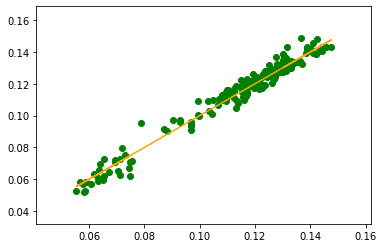

In [194]:
#treinamento usando regressão Linear

lr = linear_model.LinearRegression()
lr.fit(x_train, y_train)
pred= lr.predict(x_test)
cd =r2_score(y_test, pred)

print(f'Coeficiente de determinação:{cd * 100:.2f}')
plt.scatter(pred,y_test,color="green", marker='o')
plt.plot(pred,pred,color="orange")



print('RMSE: %.6f' % np.sqrt(mean_squared_error(y_test, pred )))
print('MSE: %.6f' % mean_squared_error(y_test, pred))

In [195]:
#executando a previsão

previsao=features_scale[qtd_linhas_teste:qtd_linhas]

data_pregao_full = df_acao['data_pregao']
data_pregao=data_pregao_full[qtd_linhas_teste:qtd_linhas]

res_full=df_acao['preco_fechamento']
res=res_full[qtd_linhas_teste:qtd_linhas]

pred=lr.predict(previsao)

df= pd.DataFrame({'data_pregao': data_pregao, 'real':res, 'previsao':pred})
df['real'] = df['real'].shift(+1)

df.set_index('data_pregao', inplace=True)
print(df)

               real  previsao
data_pregao                  
2020-12-18      NaN  0.127301
2020-12-21   0.1250  0.122157
2020-12-22   0.1221  0.122756
2020-12-23   0.1219  0.122012
2020-12-28   0.1204  0.120276
2020-12-29   0.1233  0.121565


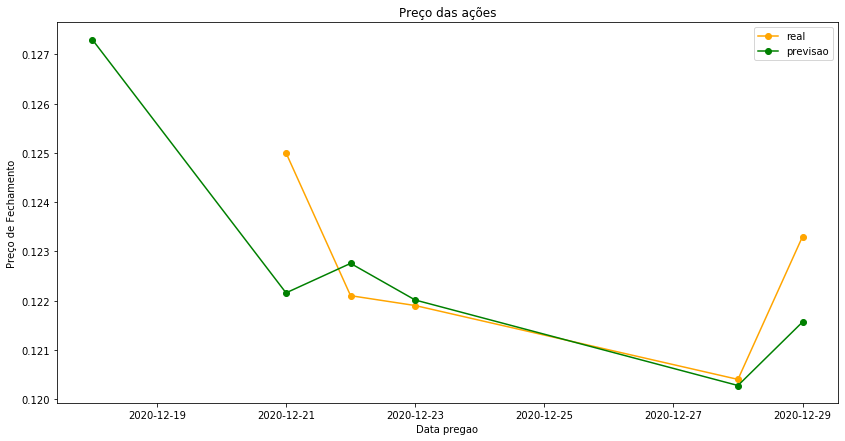

In [196]:
#grafico
plt.figure(figsize=(14,7))
plt.title('Preço das ações')
plt.plot(df['real'], label="real", color='orange', marker='o')
plt.plot(df['previsao'], label="previsao",color='green', marker='o')
plt.xlabel('Data pregao')
plt.ylabel('Preço de Fechamento')
leg = plt.legend()